In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import norm
from scipy import stats
import seaborn as sns

In [36]:
df = pd.read_csv('PREZZI.csv', sep=',').transpose()

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,733,734,735,736,737,738,739,740,741,742
A2A,1.3045,1.331,1.3175,1.340,1.3400,1.3375,1.3315,1.305,1.335,1.3280,...,1.730,1.7535,1.7465,1.7575,1.771,1.797,1.7925,1.7915,1.7895,1.7865
ABITARE IN,4.8100,4.830,4.7100,4.860,4.8600,4.8300,4.8600,4.900,4.920,4.9100,...,5.180,5.1800,5.1400,5.0400,5.000,5.060,5.0800,5.1800,5.0600,5.0000
ACEA,17.1500,17.180,17.0100,17.310,17.0700,17.2200,17.2500,17.240,17.360,17.3900,...,11.100,11.0000,11.0000,11.2700,11.370,11.590,11.6700,11.8500,11.6100,11.4500
AEFFE,1.1040,1.086,1.0700,1.118,1.1520,1.1640,1.1220,1.102,1.110,1.1120,...,0.734,0.7310,0.7330,0.7440,0.745,0.742,0.8000,0.8050,0.8140,0.8190
AEROP GUGL MARCO,8.4800,8.360,8.5200,8.520,8.4600,8.3400,8.5000,8.500,8.240,8.3800,...,8.060,8.0200,8.1000,8.1200,8.100,8.140,8.1200,8.1200,8.0800,8.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALSOIA,13.1500,13.250,13.1500,13.350,13.3000,13.1000,13.2000,13.350,13.400,13.3000,...,8.520,8.4000,8.3800,8.3000,8.400,8.400,8.4200,8.4800,8.3800,8.5400
WEBUILD,1.1820,1.156,1.1770,1.217,1.2770,1.2660,1.2380,1.261,1.258,1.2640,...,1.611,1.6150,1.6310,1.6630,1.702,1.716,1.7800,1.8070,1.7210,1.7190
WIIT,16.3000,16.800,16.6000,16.350,16.1500,16.0000,15.9500,15.850,15.400,15.6000,...,14.520,14.4800,14.5200,14.4800,14.780,15.280,15.3800,16.0600,15.7800,16.0000
ZIGNAGO VETRO,13.6800,13.780,13.8600,13.660,13.5600,13.3400,13.4600,13.680,13.500,13.7800,...,12.220,12.2400,12.2600,12.4200,12.360,12.360,12.4000,12.6600,12.7000,13.4000


In [38]:
#Create a column Daily_price that contains the list of prices for each stock

df["Daily_price"] = df.values.tolist()

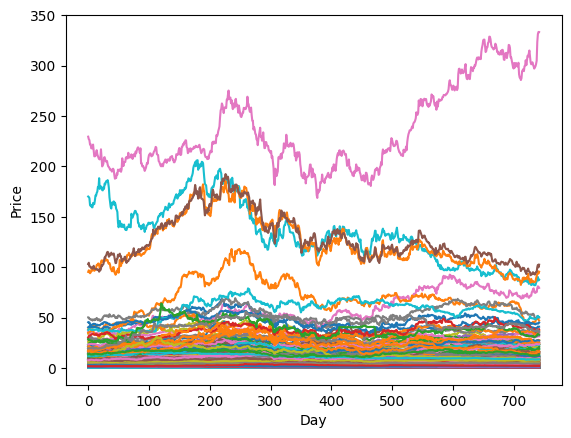

In [39]:
#Have a look at the prices during time

for row in df['Daily_price']:
    plt.plot(row)

plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [40]:
#Define the logarithm of return

def Returns(prices):
    prices = np.array(prices)
    log_returns = np.log(prices[1:] / prices[:-1])
    return log_returns.tolist()

In [41]:
#Create a column Log_return that contains the list of returns for each stock

df['Log_return'] = df['Daily_price'].apply(Returns)

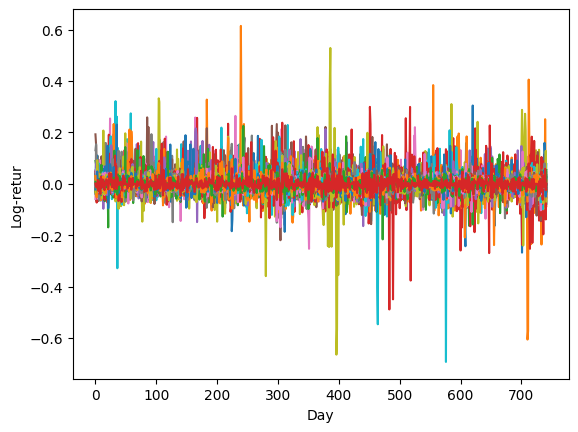

In [42]:
#Look at the log of the returns

for row in df['Log_return']:
    plt.plot(row)

plt.xlabel('Day')
plt.ylabel('Log-retur')
plt.show()

In [43]:
#We don't need more all these columns

df.drop(columns=[i for i in range(0,743)],inplace=True)

In [44]:
#Now the Dataframe looks...

df.head(10)

,Daily_price,Log_return
A2A,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328557, -0.010194537979594277, ..."
ABITARE IN,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.9...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.5, 8.5,...","[-0.014252022707201615, 0.018957913744614207, ..."
ALERION CLEAN POWER,"[10.6, 12.85, 15.0, 14.9, 14.95, 14.65, 13.7, ...","[0.19248981022320735, 0.15470638976098133, -0...."
ALGOWATT,"[0.342, 0.341, 0.34, 0.344, 0.338, 0.343, 0.34...","[-0.002928259779088334, -0.0029368596733097135..."
ALKEMY,"[7.08, 7.04, 6.92, 6.9, 6.84, 7.1, 7.0, 7.0, 6...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


<AxesSubplot: ylabel='Frequency'>

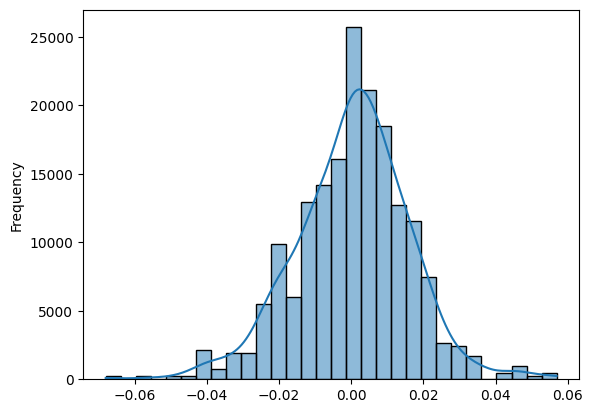

In [53]:
#Let's inspect the distribution of log returns

log_return_flattened = []

for i in range(df.shape[0]):
    element = df.iloc[i,1]
    log_return_flattened.append(element)
    
log_return_flattened = log_return_flattened[0]
sns.histplot(log_return_flattened, kde=True, stat='frequency')

mu : 0.0004237716615723467, std : 0.01580530247533797
skewness: -0.1761677880747454
kurtosis: 1.116845204332905


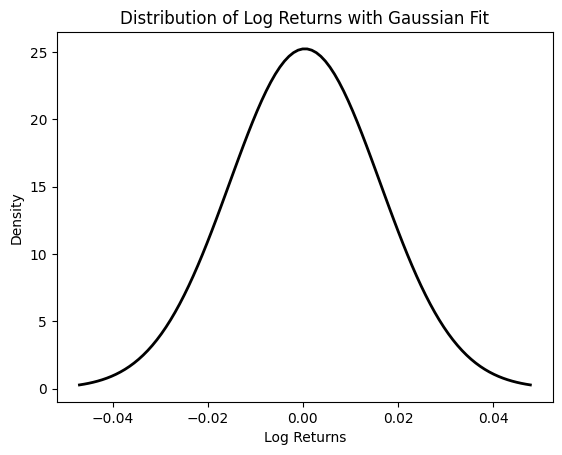

In [47]:
#Log returns follow a gaussian distribution

mu, std = norm.fit(log_return_flattened)
xmin, xmax = plt.xlim()
x = np.linspace(mu - 3 * std, mu + 3 * std, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribution of Log Returns with Gaussian Fit")
plt.xlabel("Log Returns")
plt.ylabel("Density")
print(f"mu : {mu}, std : {std}")

skewness = stats.skew(log_return_flattened)
kurtosis = stats.kurtosis(log_return_flattened)
print(f"skewness: {skewness}")
print(f"kurtosis: {kurtosis}")

In [48]:
#Define the Pearson correlation coefficient

from scipy.stats import pearsonr

def correlation_coefficient(series1, series2):
    correlation, p_value = pearsonr(series1, series2)
    return correlation

def correlation_in_windows(series1, series2, window_size):
    num_windows = len(series1) // window_size
    correlations = []

    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size

        window1 = series1[start_idx:end_idx]
        window2 = series2[start_idx:end_idx]

        correlation = correlation_coefficient(window1,window2)
        correlations.append(correlation)

    return np.sum(correlations)/len(correlations)

In [49]:
from itertools import combinations
from tqdm import tqdm

#Generate all the combinations of couples of Log_return
couples = list(combinations(df['Log_return'], 2))

#Create a column Correlation_coefficients which is a list of dictionaries
df['Correlation_coefficients'] = [{} for _ in range(len(df))]

# Compute the correlation coefficient for each couple and store the value in the dictionary
for (idx1, list1), (idx2, list2) in tqdm(combinations(df['Log_return'].items(), 2)):
    coeff = correlation_coefficient(list1, list2)
    #coeff = correlation_in_windows(list1, list2, 126)
    df.loc[idx1, 'Correlation_coefficients'][str(idx2)] = coeff
    df.loc[idx2, 'Correlation_coefficients'][str(idx1)] = coeff

16836it [00:04, 3512.88it/s]


In [50]:
#Each row of Correlation_coefficients looks...

print(df.iloc[0]['Correlation_coefficients'])

{'ABITARE IN': 0.17931521989991742, 'ACEA': 0.637114678478924, 'AEFFE': 0.3195558485617619, 'AEROP GUGL MARCO': 0.1809998625927421, 'ALERION CLEAN POWER': 0.2936832575895854, 'ALGOWATT': 0.15366841331256412, 'ALKEMY': 0.21744371808646784, 'AMPLIFON': 0.3414995215435041, 'ANIMA HOLDING': 0.44860973025030015, 'ANTARES VISION': 0.10633672010151156, 'AQUAFIL': 0.25659956488254504, 'ASCOPIAVE': 0.4690599378075542, 'AUTOSTRADE MERIDIONALI': 0.14113097918427947, 'AVIO': 0.14261601182926176, 'AZIMUT HOLDING': 0.5077062790211567, 'BANCA GENERALI': 0.4470974608813348, 'BANCA IFIS': 0.40776865188471695, 'BANCA MEDIOLANUM': 0.46886819947747777, 'BANCA MONTE DEI PASCHI': 0.1199614535047143, 'BANCA SISTEMA': 0.31538764192768864, 'BANCO BPM': 0.36038299314104966, 'BASICNET': 0.1631682914433816, 'BASTOGI': 0.047987937646495865, 'BANCA PPO.DI SONDRIO': 0.35627657904465865, 'BANCA PROFILO': 0.2472911726777342, 'BEEWIZE': 0.08306644037563729, 'BEGHELLI': 0.08922545496326716, 'BFF BANK': 0.268644294682015

<AxesSubplot: ylabel='Frequency'>

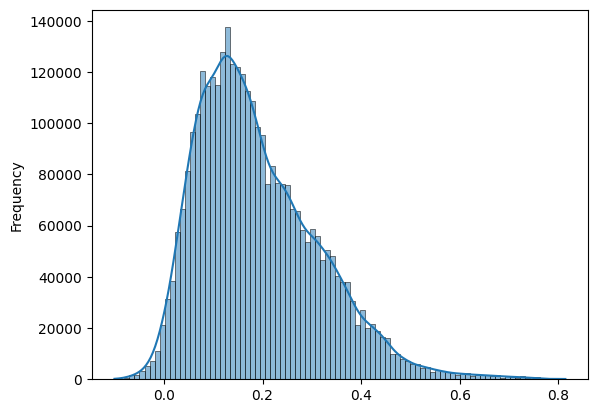

In [52]:
#Let's inspect the distribution of correlation coefficients

cc_flattened = []

for i in range(df.shape[0]):
    element = list(df.iloc[i]['Correlation_coefficients'].values())
    cc_flattened += element
    
sns.histplot(cc_flattened, kde=True, stat='frequency')

In [54]:
#Compute deciles of the correlation coefficient

l = []
for i in range(df.shape[0]):
    l.append(list(df.iloc[i]['Correlation_coefficients'].values()))
flat_l = [item for sublist in l for item in sublist]

sorted_coefficient = sorted(flat_l)
n = len(sorted_coefficient)

decili = [sorted_coefficient[int((n/10)*i)] for i in range(1, 10)]
print(decili)

[0.05267076721424906, 0.08404709767555309, 0.11301578662035984, 0.1386935183556269, 0.1670861216461497, 0.19877679692766703, 0.24072672091595856, 0.29165233999411266, 0.3591605359437259]


In [55]:
#Choose thresholds for the correlation coefficient for constructing graphs

LOW_THRESHOLD = decili[0]
MID_THRESHOLD = decili[1]
HIGH_THRESHOLD = decili[8]

In [80]:
#Function for building graphs

def build_graph(df, name):
      G = nx.Graph() 
      G.graph['name'] = name
      index = 0
      if name == "High correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight >= HIGH_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      elif name == "Low correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight >= LOW_THRESHOLD and weight <= MID_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      elif name == "Low-negative correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight <= LOW_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      else:
        print("Wrong graph's name")
        
      return G

In [81]:
#Our three graphs are...

HG = build_graph(df, "High correlation graph")
MG = build_graph(df, "Low correlation graph")
LG = build_graph(df, "Low-negative correlation graph")
GRAPHS = [HG, MG, LG]

In [99]:
'''
MST = nx.minimum_spanning_tree(G)
nx.draw(MST, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()
'''

"\nMST = nx.minimum_spanning_tree(G)\nnx.draw(MST, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)\nplt.show()\n"

The graph contains 110 nodes


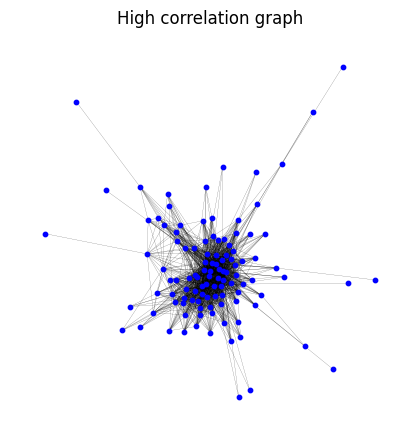

The graph contains 184 nodes


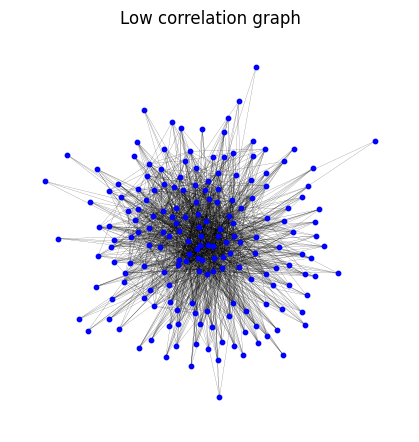

The graph contains 184 nodes


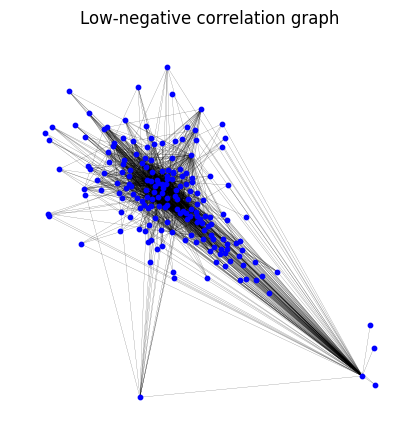

In [126]:
#Network visualization

for G in GRAPHS:
    print(f"The graph contains {nx.number_of_nodes(G)} nodes")
    plt.figure(figsize=(4, 4))
    nx.draw(G, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
    plt.title(G.graph['name'])
    plt.show()

Slope for High correlation graph is -0.2972095092330174
r_value is -0.5045335928608319
p_value is 7.339996133222511e-05


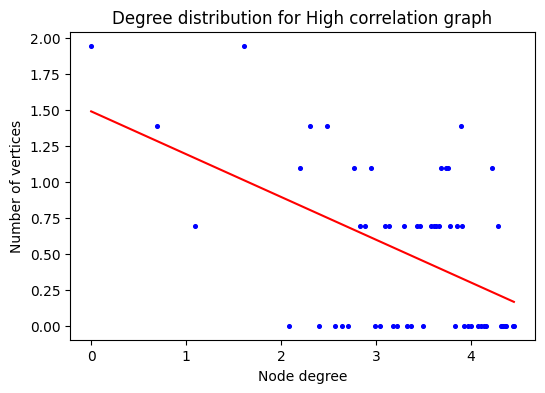

Slope for Low correlation graph is -0.6452053032138636
r_value is -0.6597473391456721
p_value is 3.3896995787702435e-07


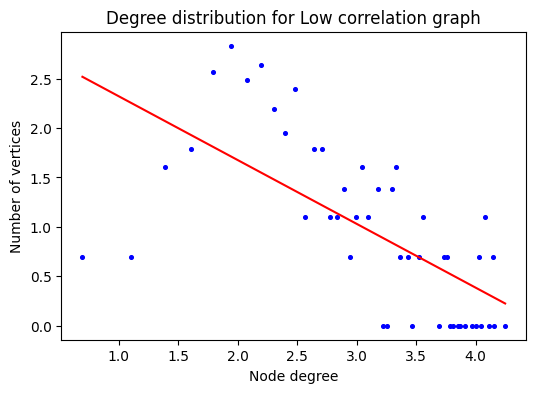

Slope for Low-negative correlation graph is -0.6327851841832057
r_value is -0.7643313337945299
p_value is 6.358872237918231e-10


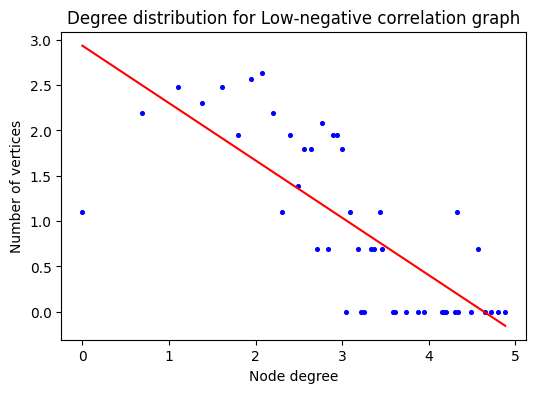

In [127]:
#Degree distribution with linear regression (logaritmic scale) -> POWER-LAW DISTRIBUTION

for G in GRAPHS:
    
    counts = nx.degree_histogram(G)
    degrees = [i for i in range(len(counts)) if counts[i] != 0]
    counts = [count for count in counts if count != 0]
    
    log_counts = np.log(counts)
    log_degrees = np.log(degrees)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_degrees, log_counts)
    print(f"Slope for {G.graph['name']} is {slope}")
    print(f"r_value is {r_value}")
    print(f"p_value is {p_value}")
    
    plt.figure(figsize=(6, 4))
    plt.title(f"Degree distribution for {G.graph['name']}")   
    plt.scatter(log_degrees, log_counts, color='b',s=7)
    plt.plot(log_degrees, slope*log_degrees + intercept, color='r')
    plt.xlabel('Node degree')
    plt.ylabel('Number of vertices')
    plt.show()


In [125]:
#Create a dictionary that contains for each graph the list of maximum cliques

CLIQUES = {}

for G in GRAPHS:
    cliques = list(nx.find_cliques(G))   
    max_clique_size = max(len(clique) for clique in cliques)
    max_cliques = [clique for clique in cliques if len(clique) == max_clique_size]
    CLIQUES[G.graph['name']] = max_cliques
    print(G.graph['name'])
    print(f"\tNumber of maximum clique found: {len(max_cliques)}")
    print(f"\tNumber of stocks in each clique: {max_clique_size}")
    print(f"\tThe cliques are: {CLIQUES[G.graph['name']]}")
    print("-------------")

High correlation graph
	Number of maximum clique found: 6
	Number of stocks in each clique: 28
	The cliques are: [['POSTE ITALIANE', 'AZIMUT HOLDING', 'BANCA GENERALI', 'BANCA MEDIOLANUM', 'ANIMA HOLDING', 'INTESA SANPAOLO', 'MEDIOBANCA BC.FIN', 'BANCA IFIS', 'STELLANTIS', 'PIRELLI & C', 'FINECOBANK SPA', 'TAMBURI INV.PARTNERS', 'INTERPUMP GROUP', 'ASSICURAZIONI GENERALI', 'BIESSE', 'MONCLER', 'WEBUILD', 'BUZZI', 'CNH INDUSTRIAL', 'CEMENTIR HOLDING', 'FRENI BREMBO', 'OVS SPA', 'DANIELI', 'CREDITO EMILIANO', 'BPER BANCA', 'BANCA PPO.DI SONDRIO', 'UNICREDIT', 'BANCO BPM'], ['POSTE ITALIANE', 'AZIMUT HOLDING', 'BANCA GENERALI', 'BANCA MEDIOLANUM', 'ANIMA HOLDING', 'INTESA SANPAOLO', 'MEDIOBANCA BC.FIN', 'BANCA IFIS', 'STELLANTIS', 'PIRELLI & C', 'FINECOBANK SPA', 'TAMBURI INV.PARTNERS', 'INTERPUMP GROUP', 'ASSICURAZIONI GENERALI', 'BIESSE', 'MONCLER', 'WEBUILD', 'BUZZI', 'CNH INDUSTRIAL', 'CEMENTIR HOLDING', 'FRENI BREMBO', 'OVS SPA', 'DANIELI', 'PRYSMIAN', 'BPER BANCA', 'BANCA PPO.DI SON

In [113]:
#Have a look at the prices/log-returns during time for stocks inside cliques

def plot_prices(df, G, cliques, variable, n_clique=None):
    '''
        df: dataframe
        G: Graph
        cliques: the dictionary of cliques
        variable: what I want to plot. It can be 'Daily_price' or 'Log_return'
        n_clique: the number of the clique I want to plot
    
    '''
    if n_clique == None:
        for clique in cliques[G.graph['name']]:
            print(clique)
            for stock in clique:
                plt.plot(df.loc[stock][variable])
                
            plt.xlabel('Day')
            if variable == 'Daily_price':
                plt.ylabel('Price')
            else:
                plt.ylabel('Log-return')
            plt.show()
    else:
        clique = cliques[G.graph['name']][n_clique]
        print(clique)
        for stock in clique:
            plt.plot(df.loc[stock][variable])
            
        plt.xlabel('Day')
        if variable == 'Daily_price':
            plt.ylabel('Price')
        else:
            plt.ylabel('Log-return')
        plt.show()

['POSTE ITALIANE', 'AZIMUT HOLDING', 'BANCA GENERALI', 'BANCA MEDIOLANUM', 'ANIMA HOLDING', 'INTESA SANPAOLO', 'MEDIOBANCA BC.FIN', 'BANCA IFIS', 'STELLANTIS', 'PIRELLI & C', 'FINECOBANK SPA', 'TAMBURI INV.PARTNERS', 'INTERPUMP GROUP', 'ASSICURAZIONI GENERALI', 'BIESSE', 'MONCLER', 'WEBUILD', 'BUZZI', 'CNH INDUSTRIAL', 'CEMENTIR HOLDING', 'FRENI BREMBO', 'OVS SPA', 'DANIELI', 'CREDITO EMILIANO', 'BPER BANCA', 'BANCA PPO.DI SONDRIO', 'UNICREDIT', 'BANCO BPM']


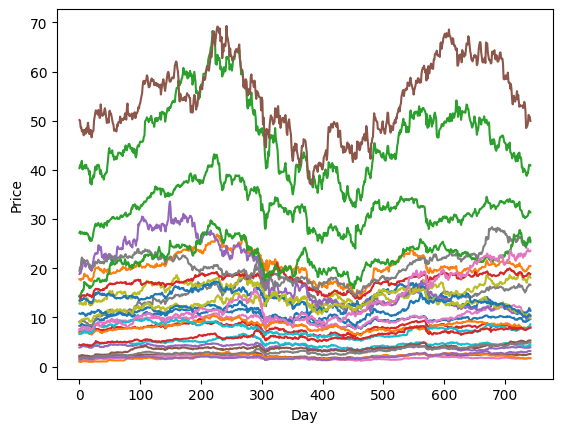

In [114]:
graph_LG = plot_prices(df, HG, CLIQUES, 'Daily_price',0)

['EEMS ITALIA', 'GIGLIO GROUP', 'SOMEC', 'SAIPEM', 'ALERION CLEAN POWER']


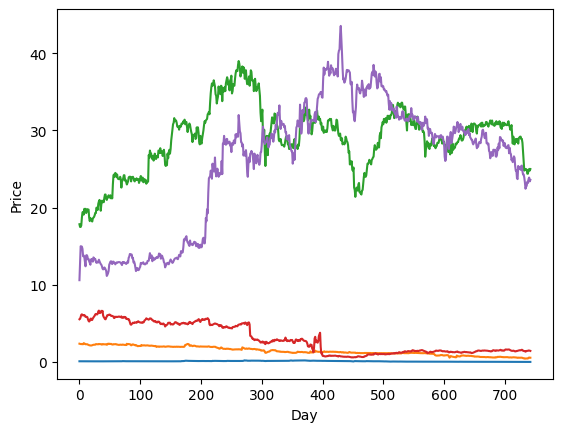

In [115]:
graph_LG = plot_prices(df, MG, CLIQUES, 'Daily_price',5)

['CSP INTERNATIONAL', 'NETWEEK', 'GEQUITY', 'FIDIA', 'PININFARINA', 'GAROFALO HEALTH CARE', 'BORGOSESIA', 'BIOERA']


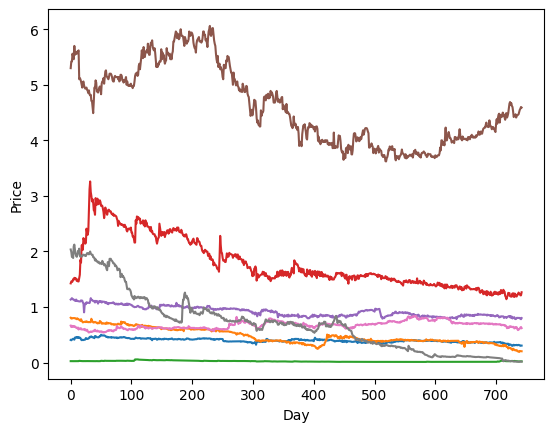

In [116]:
graph_LG = plot_prices(df, LG, CLIQUES, 'Daily_price',0)

In [124]:
#Edge density and clustering coefficient

for G in GRAPHS:
    print(G.graph['name'])
    edge_density = nx.density(G)
    print(f"\tEdge density: {edge_density}")
    
    clustering_coefficient = nx.average_clustering(G)
    print(f"\tClustering coefficient: {clustering_coefficient}")
    
    print("-------------")
    


High correlation graph
	Edge density: 0.2809007506255213
	Clustering coefficient: 0.7378098352892908
-------------
Low correlation graph
	Edge density: 0.10008315514373961
	Clustering coefficient: 0.21837209881625608
-------------
Low-negative correlation graph
	Edge density: 0.10002375861249703
	Clustering coefficient: 0.591015733801835
-------------


In [129]:
#Which are the nodes with the highest degree?

for G in GRAPHS:
    
    print(G.graph['name'])
    degrees = dict(G.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    print(f"\tThe nodes with the highest degree are: {sorted_degrees[0:5]}")
    print("-------------")

High correlation graph
	The nodes with the highest degree are: [('POSTE ITALIANE', 86), ('AZIMUT HOLDING', 85), ('INTESA SANPAOLO', 79), ('BANCA GENERALI', 78), ('BANCA MEDIOLANUM', 77)]
-------------
Low correlation graph
	The nodes with the highest degree are: [('RESTART', 70), ('BIOERA', 64), ('FIDIA', 63), ('BASTOGI', 63), ('CELLULARLINE', 61)]
-------------
Low-negative correlation graph
	The nodes with the highest degree are: [('GAS PLUS', 132), ('NETWEEK', 121), ('CIA', 112), ('ENERVIT', 104), ('FIDIA', 96)]
-------------


In [130]:
#Which are the nodes with the highest betweenness centrality?

for G in GRAPHS:
    
    print(G.graph['name'])
    betweenness_centrality = nx.betweenness_centrality(G)
    sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"\tThe nodes with the highest betweenness centrality are: {sorted_betweenness_centrality[0:5]}")
    print("-------------")
    



High correlation graph
	The nodes with the highest betweenness centrality are: [('POSTE ITALIANE', 0.08682350458603916), ('AZIMUT HOLDING', 0.060542789637605746), ('INTESA SANPAOLO', 0.054850170172839004), ('ANIMA HOLDING', 0.04546613623343892), ('INTERPUMP GROUP', 0.041707526002215105)]
-------------
Low correlation graph
	The nodes with the highest betweenness centrality are: [('RESTART', 0.06195050181768926), ('BIOERA', 0.05041165889728447), ('FIDIA', 0.04904756645125306), ('CELLULARLINE', 0.046061591813573985), ('BASTOGI', 0.0449434447099616)]
-------------
Low-negative correlation graph
	The nodes with the highest betweenness centrality are: [('GAS PLUS', 0.19144722237981926), ('NETWEEK', 0.12319326010596102), ('CIA', 0.0815671860110888), ('ENERVIT', 0.07885858463210826), ('FIDIA', 0.06266507461468913)]
-------------
